# Modelo de machine learning para previsão de churn

## Importando bibliotecas
<hr>

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)

## Conhecendo o dataset
<hr>

In [2]:
dados = pd.read_csv('Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
dados.shape

(7043, 18)

In [4]:
# verificando a quantidade de valores unicos em cada variavel

dados.nunique()

Maior65Anos                   2
Conjuge                       2
Dependentes                   2
MesesDeContrato              73
TelefoneFixo                  2
VariasLinhasTelefonicas       3
ServicoDeInternet             3
SegurancaOnline               3
BackupOnline                  3
SeguroNoDispositivo           3
SuporteTecnico                3
TVaCabo                       3
StreamingDeFilmes             3
TipoDeContrato                3
PagamentoOnline               2
FormaDePagamento              4
ContaMensal                1585
Churn                         2
dtype: int64

In [5]:
# Verificando as informacoes do dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [6]:
# Verificando se existe valores missing

dados.isnull().sum()

Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

## Tratamento de dados

### Convertendo variáveis categóricas em numéricas

In [7]:
dados_v1 = pd.get_dummies(dados, dtype=int)
dados_v1.head()

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Nao,Conjuge_Sim,Dependentes_Nao,Dependentes_Sim,TelefoneFixo_Nao,TelefoneFixo_Sim,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Nao,PagamentoOnline_Sim,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn_Nao,Churn_Sim
0,0,1,29.85,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
1,0,34,56.95,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
2,0,2,53.85,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
3,0,45,42.30,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0
4,0,2,70.70,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1


In [8]:
dados_v1.shape

(7043, 44)

In [9]:
dados_v1.drop(['Conjuge_Nao', 'Dependentes_Nao', 'TelefoneFixo_Nao', 'PagamentoOnline_Nao', 'Churn_Nao'], axis=1, inplace=True)

dados_v1.rename(columns={
                        'Conjuge_sim': 'Conjuge', 
                        'Dependentes_Sim': 'Dependentes', 
                        'TelefoneFixo_Sim': 'TelefoneFixo', 
                        'PagamentoOnline_Sim': 'PagamentoOnline', 
                        'Churn_Sim': 'Churn'}, inplace=True)

dados_v1.head()

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Sim,Dependentes,TelefoneFixo,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,0,1,29.85,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
1,0,34,56.95,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,2,53.85,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1
3,0,45,42.30,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,2,70.70,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1


In [10]:
dados_v1.shape

(7043, 39)

### Verificando o balanceamento da variável target

Text(0, 0.5, 'Quantidade')

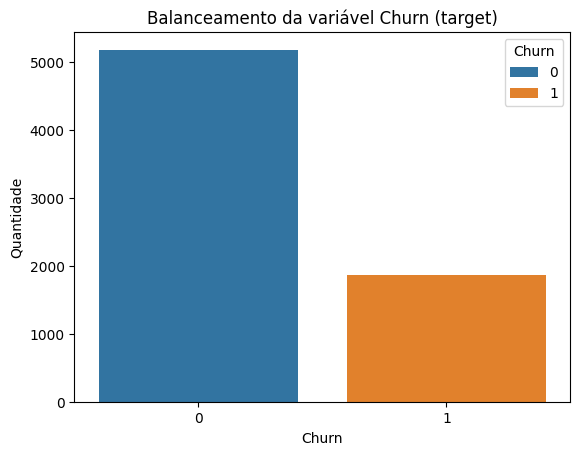

In [11]:
ax = sns.countplot(x='Churn', data=dados_v1, hue='Churn')
ax.set_title('Balanceamento da variável Churn (target)')
ax.set_xlabel('Churn')
ax.set_ylabel('Quantidade')

Como era esperado, a variável target está desbalanceada.

### Separando features de target

In [12]:
X = dados_v1.drop('Churn', axis=1)
y = dados_v1['Churn']

### Balanceando a variável target

In [93]:
smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X,y)

### Normalização dos dados

In [94]:
normalizer = StandardScaler()
X_norm = normalizer.fit_transform(X)
X_norm

array([[-0.40900744, -1.11473468, -1.32845009, ...,  1.29780819,
        -0.47363024, -0.43977642],
       [-0.40900744,  0.26101364, -0.38648245, ..., -0.77052989,
         2.11135168, -0.43977642],
       [-0.40900744, -1.07304534, -0.49423521, ..., -0.77052989,
         2.11135168, -0.43977642],
       ...,
       [-0.40900744, -0.78121994, -0.78375413, ...,  1.29780819,
        -0.47363024, -0.43977642],
       [-0.40900744, -0.82290928, -1.67290386, ..., -0.77052989,
        -0.47363024, -0.43977642],
       [-0.40900744, -0.65615191,  0.54021446, ..., -0.77052989,
        -0.47363024, -0.43977642]])

### Dividindo dataset em treino e teste

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=123)

## Modelo KNN

In [96]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [97]:
knn_pred = knn.predict(X_test)

## Modelo Bernoulli Naive Bayes

Esse modelo necessita que as variáveis sejam binárias. Por conta disso, iremos binarizar as variaveis. Em seguida, criaremos o modelo.

In [98]:
X_train_binarized = np.where(X_train >= np.median(X_train), 1, 0)
X_test_binarized = np.where(X_test >= np.median(X_train), 1, 0)

In [99]:
bnb = BernoulliNB()

In [100]:
bnb.fit(X_train_binarized, y_train)

BernoulliNB()

In [101]:
bnb_pred = bnb.predict(X_test_binarized)

## Modelo Árvore de decisão

In [102]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [103]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [104]:
dtc_pred = dtc.predict(X_test)

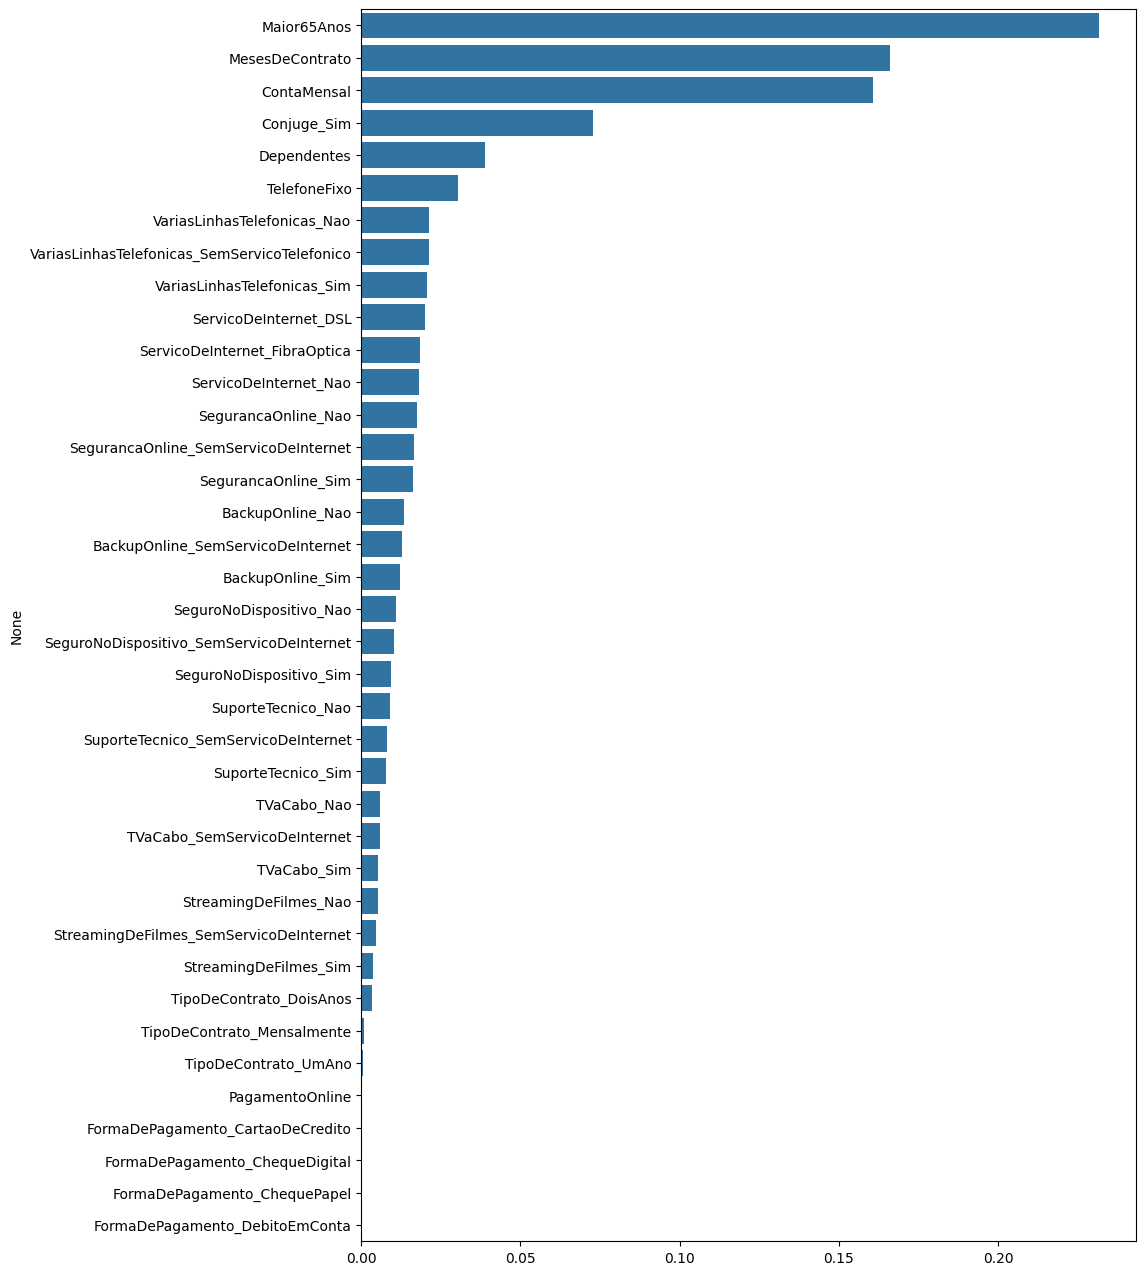

In [105]:
predito_img = plt.figure(figsize=(10,16))

importances = np.sort(dtc.feature_importances_)[::-1]
sns.barplot(x=importances, y=X.columns, orient='h')
plt.show()

## Validação dos modelos

### Matriz de Confusão

In [106]:
cm_knn = confusion_matrix(y_test, knn_pred)
cm_bnb = confusion_matrix(y_test, bnb_pred)
cm_dtc = confusion_matrix(y_test, dtc_pred)

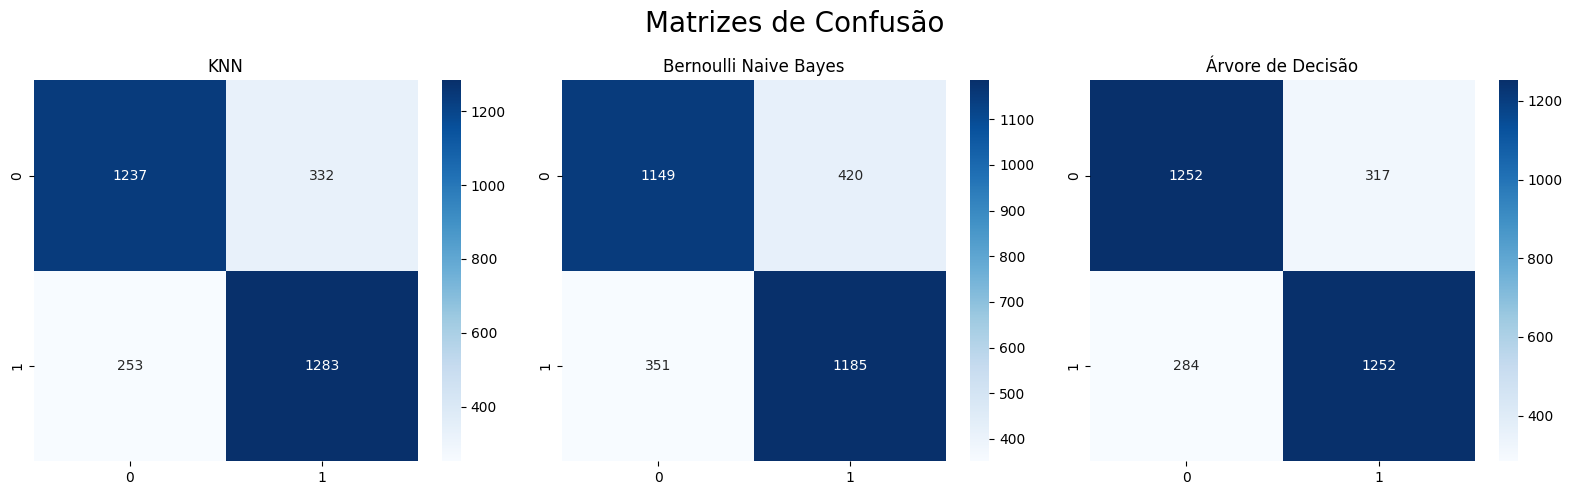

In [107]:
fig,axes = plt.subplots(1,3, figsize=(16,5))

sns.heatmap(data=cm_knn, cmap='Blues', fmt='d', annot=True, ax=axes[0]).set_title('KNN')
sns.heatmap(data=cm_bnb, cmap='Blues', fmt='d', annot=True, ax=axes[1]).set_title('Bernoulli Naive Bayes')
sns.heatmap(data=cm_dtc, cmap='Blues', fmt='d', annot=True, ax=axes[2]).set_title('Árvore de Decisão')

fig.suptitle('Matrizes de Confusão', fontsize=20)
plt.tight_layout()

### Acurácia

In [126]:
print('Acurácia do modelo KNN:                      {:.2f}' .format(accuracy_score(y_test, knn_pred)*100))
print('Acurácia do modelo Bernoulli de Naive Bayes: {:.2f}' .format(accuracy_score(y_test, bnb_pred)*100))
print('Acurácia do modelo Árvore de Decisão:        {:.2f}' .format(accuracy_score(y_test, dtc_pred)*100))

Acurácia do modelo KNN:                      81.16
Acurácia do modelo Bernoulli de Naive Bayes: 75.17
Acurácia do modelo Árvore de Decisão:        80.64


### Precisão

In [127]:
print('Precisão do modelo KNN:                      {:.2f}' .format(precision_score(y_test, knn_pred)*100))
print('Precisão do modelo Bernoulli de Naive Bayes: {:.2f}' .format(precision_score(y_test, bnb_pred)*100))
print('Precisão do modelo Árvore de Decisão:        {:.2f}' .format(precision_score(y_test, dtc_pred)*100))

Precisão do modelo KNN:                      79.44
Precisão do modelo Bernoulli de Naive Bayes: 73.83
Precisão do modelo Árvore de Decisão:        79.80


### Recall

In [128]:
print('Recall do modelo KNN:                      {:.2f}' .format(recall_score(y_test, knn_pred)*100))
print('Recall do modelo Bernoulli de Naive Bayes: {:.2f}' .format(recall_score(y_test, bnb_pred)*100))
print('Recall do modelo Árvore de Decisão:        {:.2f}' .format(recall_score(y_test, dtc_pred)*100))

Recall do modelo KNN:                      83.53
Recall do modelo Bernoulli de Naive Bayes: 77.15
Recall do modelo Árvore de Decisão:        81.51


## Escolhendo o melhor modelo

Para escolher o melhor modelo, utilizaremos a métrica de precisão. Logo, o modelo escohido é o modelo de Árvore de decisão.

In [130]:
print('Precisão do modelo KNN:                      {:.2f}' .format(precision_score(y_test, knn_pred)*100))
print('Precisão do modelo Bernoulli de Naive Bayes: {:.2f}' .format(precision_score(y_test, bnb_pred)*100))
print('Precisão do modelo Árvore de Decisão:        {:.2f}' .format(precision_score(y_test, dtc_pred)*100))

Precisão do modelo KNN:                      79.44
Precisão do modelo Bernoulli de Naive Bayes: 73.83
Precisão do modelo Árvore de Decisão:        79.80
